# Modify Model

In [39]:
pysical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(pysical_devices))

Num GPUs Available:  0


In [40]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [41]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [42]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [43]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

In [44]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [45]:
model = Model(inputs=mobile.input, outputs=output)

In [46]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [47]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [48]:
params = count_params(model)
assert params['non_trainable_params'] == 1365184
assert params['trainable_params'] == 1873930

# Train the model

In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
X_train = train_batches
y_train = train_batches.classes
X_valid = valid_batches
y_valid = valid_batches.classes

In [51]:
# Run for more epochs (~30) to see better results
model.fit(x=X_train, validation_data=X_valid, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 150 steps, validate for 30 steps
Epoch 1/10
150/150 - 332s - loss: 0.8794 - accuracy: 0.7313 - val_loss: 1.3242 - val_accuracy: 0.5300
Epoch 2/10
150/150 - 307s - loss: 0.1346 - accuracy: 0.9867 - val_loss: 0.9581 - val_accuracy: 0.6933
Epoch 3/10
150/150 - 368s - loss: 0.0504 - accuracy: 0.9993 - val_loss: 0.7346 - val_accuracy: 0.7967
Epoch 4/10
150/150 - 352s - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.6614 - val_accuracy: 0.8133
Epoch 5/10
150/150 - 367s - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.6010 - val_accuracy: 0.8467
Epoch 6/10
150/150 - 356s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.5829 - val_accuracy: 0.8367
Epoch 7/10
150/150 - 367s - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.5346 - val_accuracy: 0.8633
Epoch 8/10
150/150 - 373s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.5145 - val_accuracy: 0.8667
Epoch 9/10
150/150 - 353s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.4839 - val_accura

# Predict sign language digits

In [52]:
X_test = test_batches
y_test = test_batches.classes

In [53]:
predictions = model.predict(x=X_test, verbose=0)

In [54]:
y_pred = predictions.argmax(axis=-1)  

# Create a confusion matrix

In [55]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  1  0  0  0]
 [ 0  0  1 14  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  3  0  0  0]
 [ 0  0  0  0  1 14  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  1  0  0  0  0 14  0  0]
 [ 0  0  2  1  0  0  0  5  7  0]
 [ 0  0  0  1  0  0  1  0  0 13]]


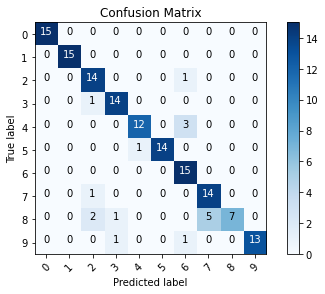

In [57]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [58]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm.sum()-(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  133 correct predictions.
 The result is telling us that we have:  17 incorrect predictions.
 We have a total predictions of:  150


# Create a classification report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       0.78      0.93      0.85        15
           3       0.88      0.93      0.90        15
           4       0.92      0.80      0.86        15
           5       1.00      0.93      0.97        15
           6       0.75      1.00      0.86        15
           7       0.74      0.93      0.82        15
           8       1.00      0.47      0.64        15
           9       1.00      0.87      0.93        15

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.88       150
weighted avg       0.91      0.89      0.88       150



In [60]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Convolutional Neural Network model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy = "{:.2%}".format(metrics.accuracy_score(y_test, y_pred))

Accuracy of the Convolutional Neural Network model: 88.67%

Well, you got a classification rate of 88.67%


In [61]:
#calculate Precision
print("Precision of the Convolutional Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred, average='macro')))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our model predicted a sign language digit image is of a particular digit, that image is actually of that image", "{:.2%}".format(metrics.precision_score(y_test, y_pred, average='macro')) ,"of the time.")

Precision of the Convolutional Neural Network model: 90.63%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our model predicted a sign language digit image is of a particular digit, that image is actually of that image 90.63% of the time.


In [62]:
#calculate Recall
print("Recall of the Convolutional Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred, average='macro')))
print("\nRecall:If there is sign language digit image of a particular digit present in the test set - our model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred, average='macro')) ,"of the time.")

Recall of the Convolutional Neural Network model: 88.67%

Recall:If there is sign language digit image of a particular digit present in the test set - our model can identify it 88.67% of the time.


In [63]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, y_pred)

0.937037037037037

# Deploy the model

In [64]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\real_time')
if os.path.isdir('C:\\Users\רועי\\data\\sign-language-digits\\pred') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\pred')
    for i in random.sample(glob.glob('*'), 1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\pred') 

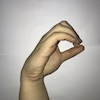

In [65]:
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\pred')
for i in random.sample(glob.glob('*'), 1):
    Image(filename=i)  

Image(filename=i)

In [66]:
pred_filenames = os.listdir("C:\\Users\רועי\\data\\sign-language-digits\\pred")
pred_df = pd.DataFrame({'filename': pred_filenames})
nb_samples = pred_df.shape[0]
batch_size = 10
pred_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
pred_generator = pred_gen.flow_from_dataframe(pred_df, "C:\\Users\רועי\\data\\sign-language-digits\\pred", 
                                              x_col='filename',
                                              y_col=None,
                                              class_mode=None,
                                              batch_size=batch_size,
                                              target_size=(224, 224),
                                              shuffle=False)

Found 1 validated image filenames.


In [67]:
X_pred = pred_generator
X_pred

In [68]:
pred = model.predict(X_pred, verbose=0)
pred

array([[9.9125940e-01, 2.3416567e-03, 1.8697492e-04, 2.3345158e-03,
        2.6540922e-05, 4.2686317e-04, 2.6601448e-03, 3.7084290e-04,
        2.6547542e-04, 1.2758464e-04]], dtype=float32)

In [69]:
rounded_pred = np.argmax(np.round(pred), axis=-1) 
rounded_pred

array([0], dtype=int64)

In [70]:
X_pred = pred_generator
pred = model.predict(X_pred, verbose=0)
rounded_pred = np.argmax(np.round(pred), axis=-1) 
if rounded_pred[0] == 0:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 0")
elif rounded_pred[0] == 1:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 1")
elif rounded_pred[0] == 2:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 2")
elif rounded_pred[0] == 3:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 3")
elif rounded_pred[0] == 4:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 4")
elif rounded_pred[0] == 5:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 5")
elif rounded_pred[0] == 6:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 6")
elif rounded_pred[0] == 7:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 7")
elif rounded_pred[0] == 8:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 8")
else:
    print("\033[1m The algorithm predicts, with accuracy of", accuracy, "that this is a sign language digit image of the digit 9")

 The algorithm predicts, with accuracy of 88.67% that this is a sign language digit image of the digit 0


### 1. model.save()

In [71]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [72]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\sign_language_digits_model.h9') is False:
    model.save('C:\\Users\\רועי\\models\sign_language_digits_model.h9')

This save functions saves:
1. The architecture of the model allowing to re-create the moddel.
2. The weights of the model.
3. The training configuration (loss, optimizer).
4. The state of the optimizer, allowing to resume training exactly where you left off.

In [73]:
from tensorflow.keras.models import load_model
new_model = load_model('C:\\Users\\רועי\\models\\sign_language_digits_model.h9')

In [74]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                2007050   
Total params: 2,026,442
Trainable params: 2,026,442
Non-trainable params: 0
______________________________________________

In [75]:
new_model.get_weights()

[array([[[[ 0.0672067 , -0.06566494, -0.08850947, -0.02297985,
            0.0074609 ,  0.1196911 ,  0.00638986,  0.07704552,
           -0.11744843, -0.02887065,  0.08089577, -0.00144913,
            0.10756753, -0.12422702,  0.03552623, -0.0645935 ,
           -0.0121367 , -0.12403099,  0.12123438,  0.11400798,
           -0.01712661, -0.02541955, -0.00709075, -0.0719615 ,
            0.02541872, -0.12160353, -0.09715298, -0.09153607,
            0.11875553,  0.00309148,  0.11897452, -0.01808622],
          [ 0.03325587, -0.06339841,  0.13537745, -0.11256377,
            0.08263449, -0.12040972, -0.08766168,  0.13700941,
            0.09618331,  0.02591191,  0.02111536,  0.09916868,
           -0.05573285,  0.06999898,  0.01475394, -0.01526228,
           -0.01533596,  0.07547759, -0.06939583, -0.13878724,
            0.11538702, -0.05965655,  0.02276858, -0.06219549,
            0.13235731,  0.10599652, -0.01236846,  0.09199111,
            0.06998204,  0.10620846, -0.09179457, -0.0

In [76]:
new_model.optimizer

### 2. model.to_json()

if you only need to save architecture of a model, and not its weights or its training configuration, you can see the following function to save the architecture only.

In [77]:
# save as JSON
json_string = model.to_json()

In [78]:
json_string

'{"class_name": "Model", "config": {"name": "model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "ZeroPadding2D", "config": {"name": "conv1_pad", "trainable": false, "dtype": "float32", "padding": [[0, 1], [0, 1]], "data_format": "channels_last"}, "name": "conv1_pad", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv1", "trainable": false, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": false, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_const

In [79]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [80]:
model_architecture.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

### 3. model.save_weights()

If you only need to save the weights of the model, you cab use the following function save the weights only.

In [81]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\sign_language_digits_model.h9') is False:
    model.save_weights('C:\\Users\\רועי\\models\\sign_language_digits_model.h9')

In [82]:
model.get_weights()

[array([[[[ 8.87084053e-14,  3.11129272e-01,  1.19772255e-02,
            1.65614850e-13,  1.67507152e-14,  2.31184348e-01,
           -2.32737631e-01, -2.96911478e-01, -4.32953903e-15,
            8.21083635e-02,  3.79058927e-01,  9.35078702e-14,
            1.45881534e-01,  1.58076912e-01, -1.66753982e-03,
            4.56319394e-05, -5.14434686e-13, -1.85627863e-01,
            4.04302508e-01, -2.56781399e-01,  1.27436947e-13,
            8.86099631e-15, -6.08684048e-02,  2.80227751e-01,
            1.13050954e-03,  2.00989982e-03,  3.01095426e-01,
           -1.71066225e-01, -5.65458477e-01,  2.62688458e-01,
           -4.01542217e-01, -2.50179484e-03],
          [ 1.05321493e-13, -3.48603338e-01,  3.99522372e-02,
            1.44252747e-13,  5.91760866e-14,  1.67545795e-01,
           -1.13974318e-01,  9.64645147e-02,  8.52340540e-15,
           -1.87848985e-01,  3.75256538e-01,  1.19941383e-13,
            1.45519465e-01,  1.86711788e-01,  1.53669920e-02,
            4.60369374e-

# Clean and Delete all the Directories

In [83]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\0')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\0_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\0')
os.chdir('../../')

In [84]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\1')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\1_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\1')
os.chdir('../../')

In [85]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\2')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\2_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\2')
os.chdir('../../')

In [86]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\3')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\3_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\3')
os.chdir('../../')

In [87]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\4')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\4_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\4')
os.chdir('../../')

In [88]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\5')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\5_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\5')
os.chdir('../../')

In [89]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\6')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\6_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\6')
os.chdir('../../')

In [90]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\7')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\7_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\7')
os.chdir('../../')

In [91]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\8')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\8_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\8')
os.chdir('../../')

In [92]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\9')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\9_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\9')
os.chdir('../../')

In [93]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\0')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\0_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\0')
os.chdir('../../')

In [94]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\1')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\1_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\1')
os.chdir('../../')

In [95]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\2')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\2_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\2')
os.chdir('../../')

In [96]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\3')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\3_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\3')
os.chdir('../../')

In [97]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\4')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\4_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\4')
os.chdir('../../')

In [98]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\5')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\5_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\5')
os.chdir('../../')

In [99]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\6')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\6_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\6')
os.chdir('../../')

In [100]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\7')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\7_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\7')
os.chdir('../../')

In [101]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\8')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\8_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\8')
os.chdir('../../')

In [102]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\9')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\9_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\9')
os.chdir('../../')

In [103]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\0')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\0_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\0')
os.chdir('../../')

In [104]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\1')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\1_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\1')
os.chdir('../../')

In [105]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\2')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\2_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\2')
os.chdir('../../')

In [106]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\3')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\3_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\3')
os.chdir('../../')

In [107]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\4')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\4_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\4')
os.chdir('../../')

In [108]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\5')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\5_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\5')
os.chdir('../../')

In [109]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\6')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\6_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\6')
os.chdir('../../')

In [110]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\7')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\7_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\7')
os.chdir('../../')

In [111]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\8')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\8_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\8')
os.chdir('../../')

In [112]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\9')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\9_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\9')
os.chdir('../../')

In [113]:
# Delete data from pred directory
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\pred')
for i in random.sample(glob.glob('*'), 1):
    shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\real_time')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\sign-language-digits\\pred')
os.chdir('../../')